# Distribuciones de score cortadas por variable y nivel 

In [ ]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sj = pd.read_csv("/home/matias2202/Documentos/argXed/super_join.csv")

In [158]:
primaria = sj[(sj["nivel"]=="primaria") & (sj["gestion"]!="social/cooperativa")]
secundaria = sj[(sj["nivel"]=="secundaria") & (sj["gestion"]!="social/cooperativa")]

## Definiciones

In [159]:
ORDER= ['avanzado','satisfactorio','basico','por_debajo_del_basico']

SCORE_LANGUAGE = 'nivel_desemp_lengua'
SCORE_MATHS = 'nivel_desemp_matematica'
SCORE_SOCIAL = 'nivel_desemp_ciencias_sociales'
SCORE_NATURAL = 'nivel_desemp_ciencias_naturales'

ponderators = {
    SCORE_LANGUAGE: 'ponderador_lengua',
    SCORE_MATHS:'ponderador_matematica',
    SCORE_SOCIAL: 'ponderador_ciencias_sociales',
    SCORE_NATURAL: 'ponderador_ciencias_naturales' 
}


colors = {
    SCORE_LANGUAGE: 'blue',
    SCORE_MATHS:'red',
    SCORE_SOCIAL: 'orange',
    SCORE_NATURAL: 'green' 
}

LEGEND_TITLE={
    "tiene_smartphone":"Tiene smartphone",
    "repeticion_primaria": "Repitió primaria",
    "repeticion_secundaria": "Repitió secundaria",
    "gestion": "Gestión",
    "tasa_con_nbi":"Tasa con NBI",
    "indice_socioeconomico_medio":"Índice socioeconómico",
    "icse":"ICSE"
}

LEGEND_DESCR={
    "tiene_smartphone":{"si":"Sí","no":"No"},
    "repeticion_primaria": {"dos_veces": "2 veces", "no": "No repitió", "tres_veces_o_mas": "3 veces o más", "una_vez": "1 vez"},
    "repeticion_secundaria": {"dos_veces": "2 veces", "no": "No repitió", "tres_veces_o_mas": "3 veces o más", "una_vez": "1 vez"},
    "gestion": {"estatal":"Estatal","privada":"Privada"}
}


features_interes_discretas = {
    "tiene_smartphone":"tiene o no smartphone",
    "repeticion_primaria": "repitió o no la primaria",
    "repeticion_secundaria": "repitió o no la secundaria",
    "gestion": "el tipo de gestión"
}

features_interes_continuas ={
    "tasa_con_nbi":"Tasa con NBI",
    "indice_socioeconomico_medio":"Índice socioeconómico",
    "icse":"ICSE"
}

subjects = {SCORE_MATHS:"matemática",
            SCORE_LANGUAGE:"lengua",
            SCORE_SOCIAL:"sociales",
            SCORE_NATURAL:"naturales"}

CANTIDAD_PRIMARIA = len(primaria)
CANTIDAD_SECUNDARIA = len(secundaria)


XTIKS_DISCRETOS = ["Avanzado", "Satisfactorio", "Básico", "Por debajo del básico"]


### Pequeño analisis de nivel

In [160]:
sum(sj['nivel'].isnull())

0

In [161]:
sum(sj.loc[sj['nivel']=='nc']['nivel'])

0

Todos los valores del data set tienen completo el nivel

In [162]:
(sj['nivel'].value_counts() / len(sj['nivel']))*100

primaria      62.74515
secundaria    37.25485
Name: nivel, dtype: float64

## Funciones

In [189]:
def normalize_dataframe(df,feature, scores):
    ponderator = ponderators[scores]
    df = df[df[feature].notna()]
    df = df[df[feature] != 'nc']
    aux = df[(df[ponderator].notnull()) &(df[ponderator]!=-1.0) & (df[scores].notnull())]
    aux = aux.groupby([feature,scores]).agg({ponderator:"sum"})
    if len(aux) == 0: return []
    for i in df[feature].unique():
        aux.loc[i] = aux.loc[i].values / sum(aux.loc[i].get_values())[0]
    aux = aux.reset_index()
    return aux

## Analisis de variables discretas

### Variables primaria

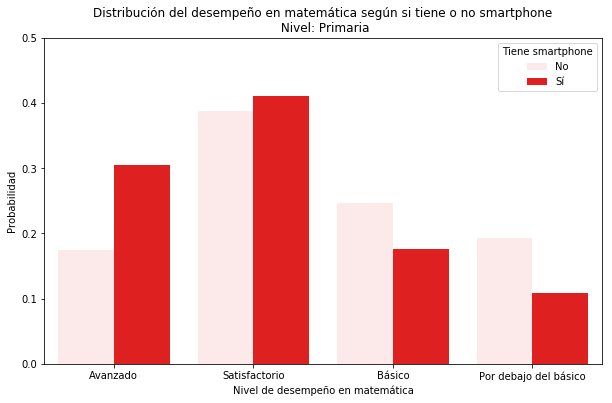

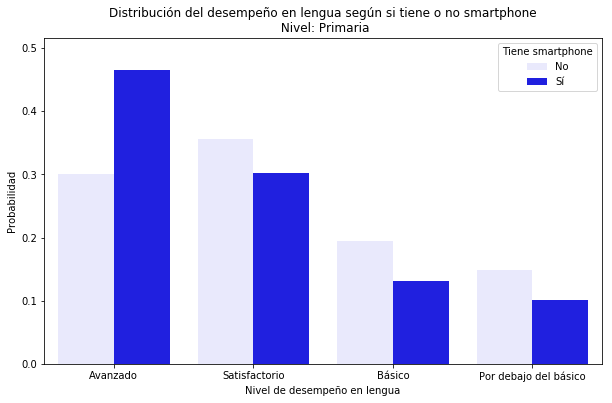

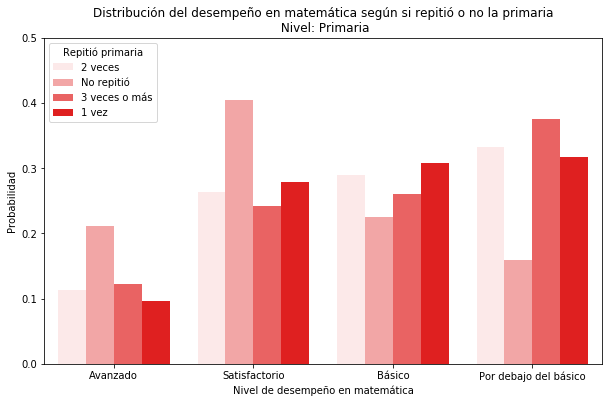

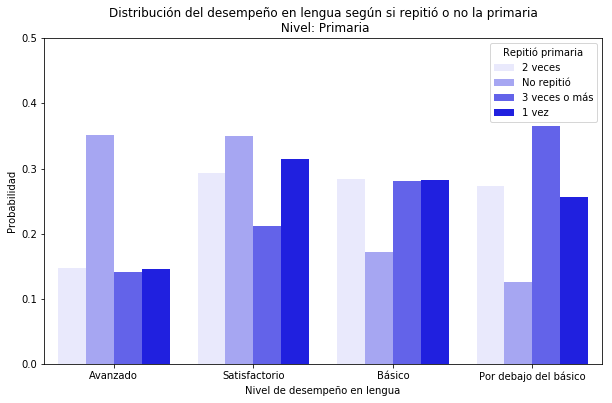

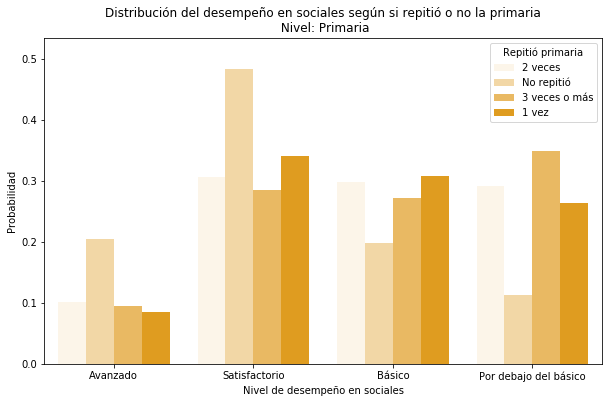

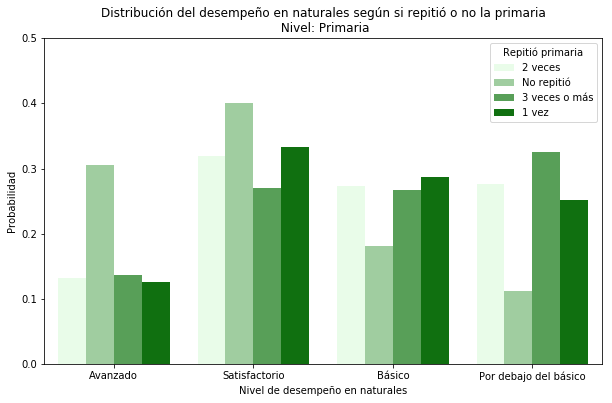

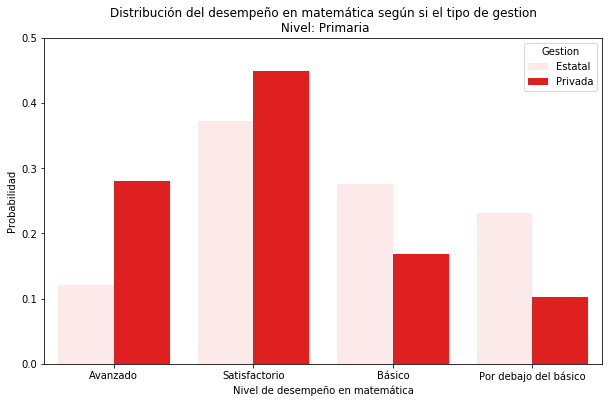

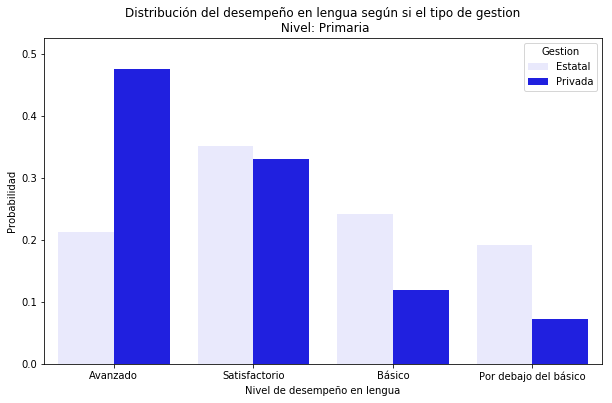

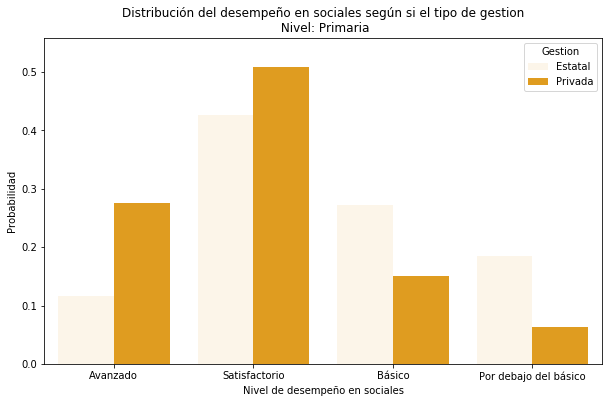

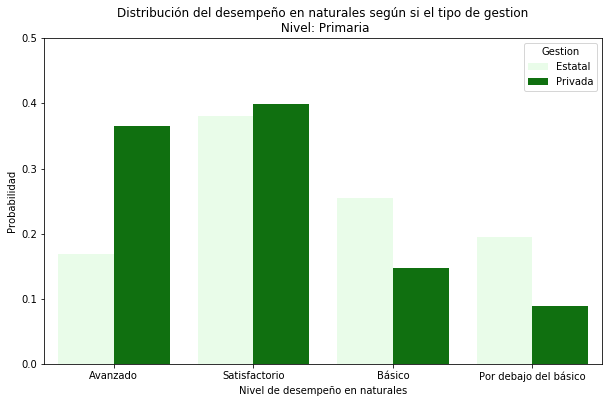

In [190]:
for feature in features_interes_discretas:
    for materia in subjects:
        aux = normalize_dataframe(primaria,feature=feature,scores=materia)
        if (len(aux)==0): continue
        fig, ax = plt.subplots()
        fig.set_size_inches(10, 6)
        plt.title("Distribución del desempeño en "+ subjects[materia] +" según si " + features_interes_discretas[feature]+ "\n Nivel: Primaria")
        g=sns.barplot(x=materia,y=ponderators[materia],hue=feature,data=aux, order= ORDER,color=colors[materia])
        leg = g.axes.get_legend()
        leg.set_title(LEGEND_TITLE[feature])
        LABELS = LEGEND_DESCR[feature]
        for t in leg.texts: t.set_text(LABELS[t.get_text()])
        plt.ylabel("Probabilidad")
        plt.xlabel("Nivel de desempeño en " + subjects[materia])
        ax.set_xticklabels(XTIKS_DISCRETOS)
        plt.ylim([0,max(0.5,max(aux[ponderators[materia]])+0.05)])
        plt.savefig("plots/distribucion_"+feature+"_"+materia+"_primaria.svg",format = "svg", bbox_inches='tight')

### Variables secundaria

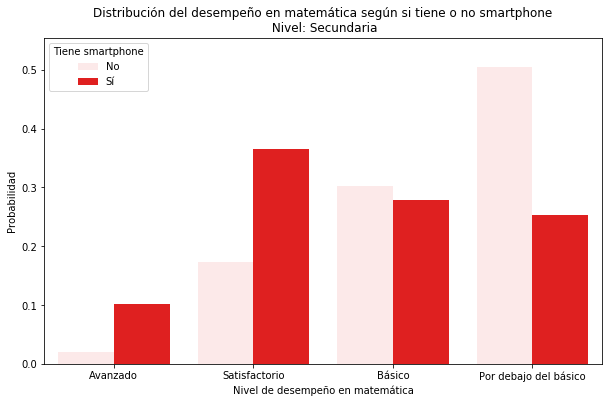

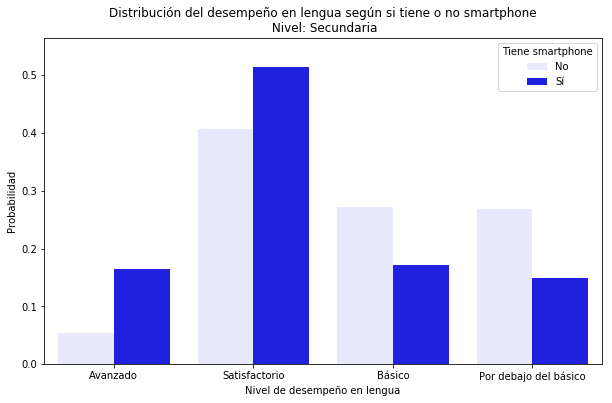

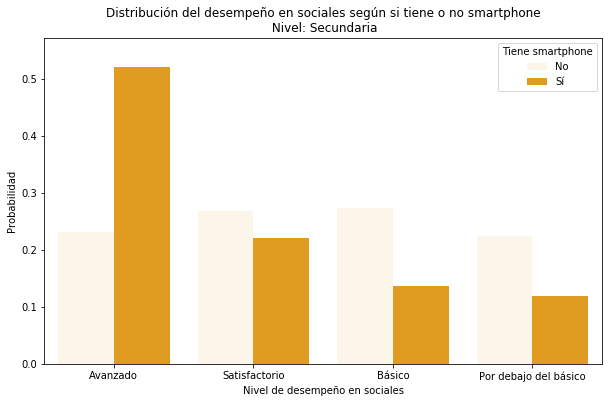

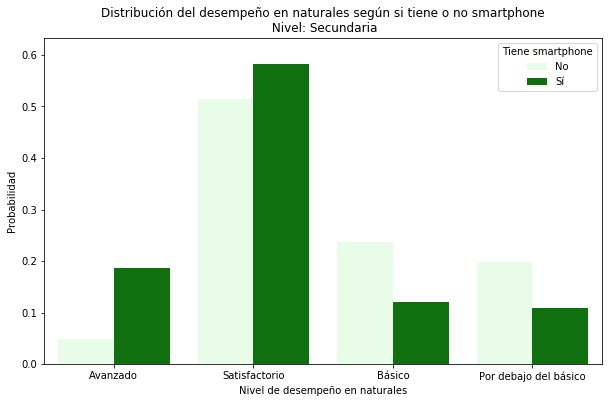

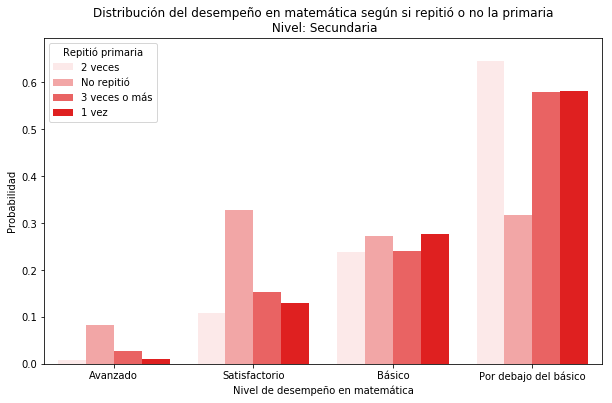

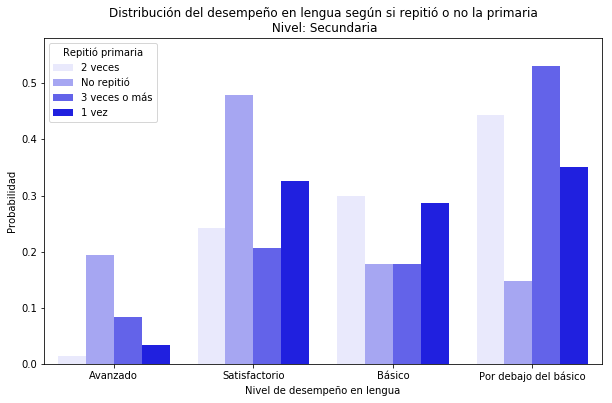

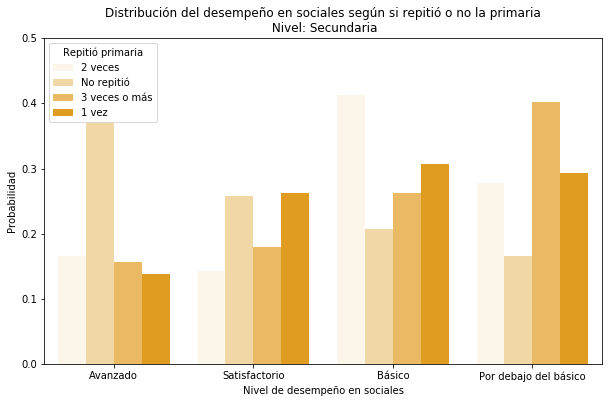

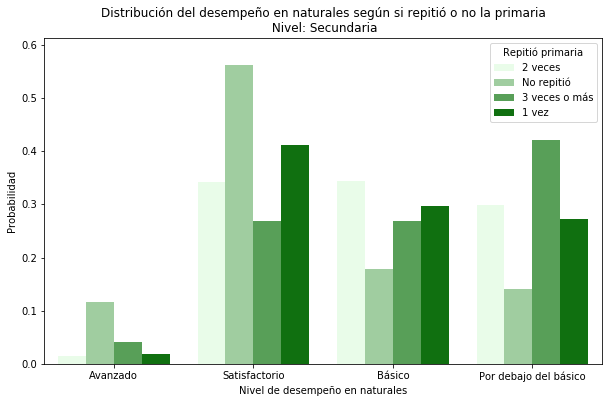

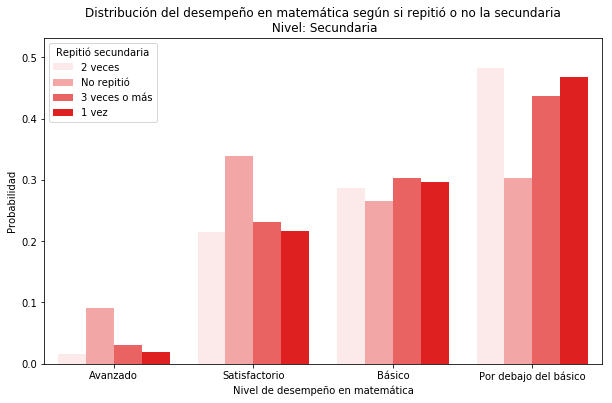

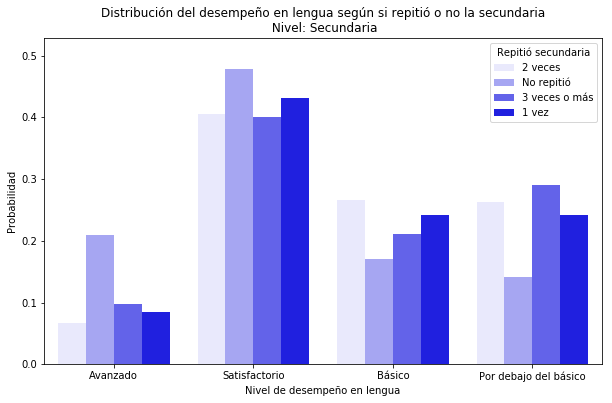

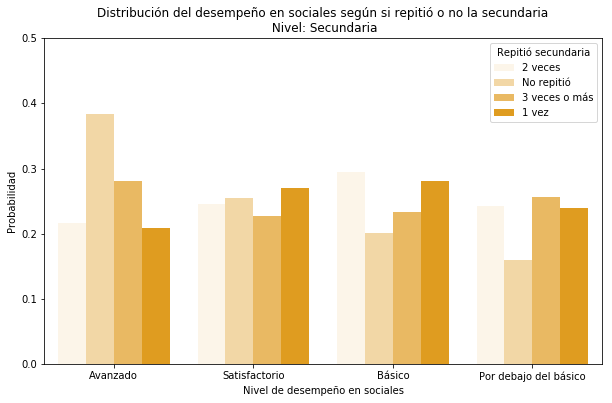

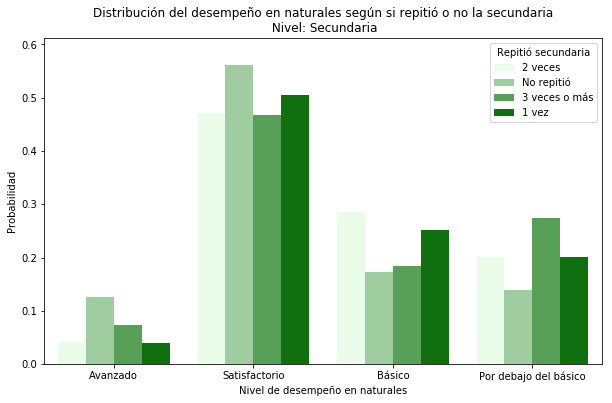

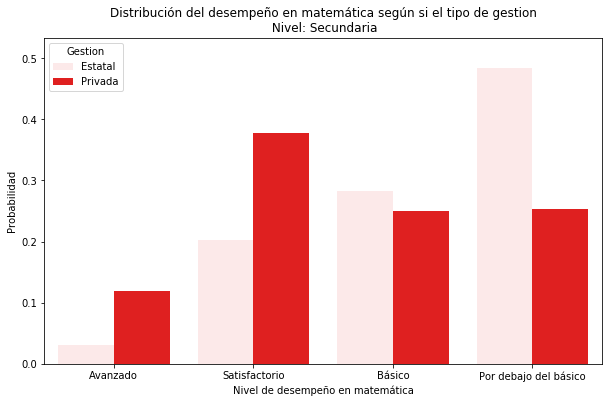

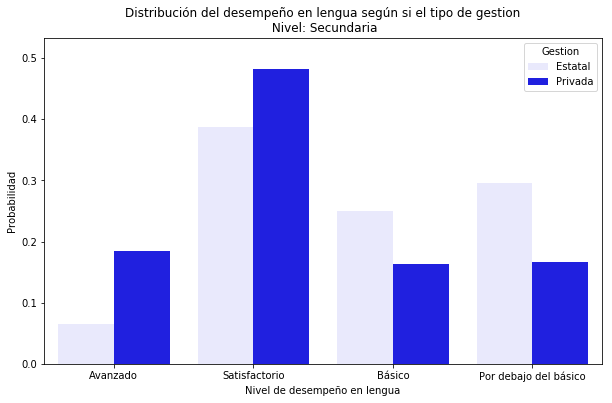

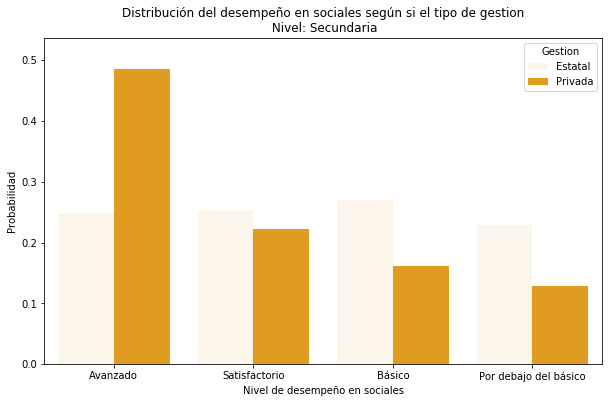

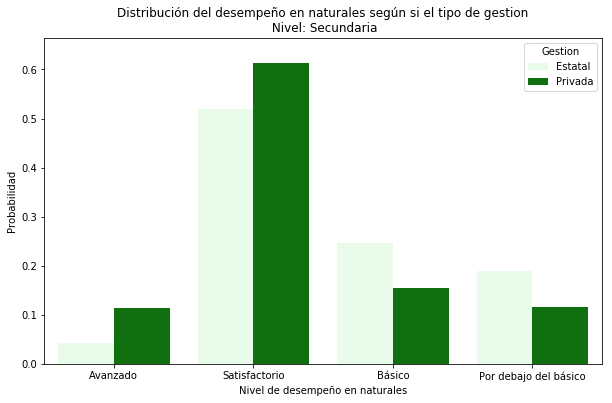

In [191]:
for feature in features_interes_discretas:
    for materia in subjects:
        aux = normalize_dataframe(secundaria,feature=feature,scores=materia)
        if (len(aux)==0): continue
        fig, ax = plt.subplots()
        fig.set_size_inches(10, 6)
        ax.set_xticklabels(XTIKS_DISCRETOS)
        plt.title("Distribución del desempeño en "+ subjects[materia] +" según si " + features_interes_discretas[feature]+ "\n Nivel: Secundaria")
        g=sns.barplot(x=materia,y=ponderators[materia],hue=feature,data=aux, order= ORDER,color=colors[materia])
        leg = g.axes.get_legend()
        leg.set_title(LEGEND_TITLE[feature])
        LABELS = LEGEND_DESCR[feature]
        for t in leg.texts: t.set_text(LABELS[t.get_text()])
        plt.ylabel("Probabilidad")
        plt.xlabel("Nivel de desempeño en " + subjects[materia])
        ax.set_xticklabels(XTIKS_DISCRETOS)
        plt.ylim([0,max(0.5,max(aux[ponderators[materia]])+0.05)])
        plt.savefig("plots/distribucion_desempeño_"+feature+"_"+materia+"_secundaria.svg",format = "svg", bbox_inches='tight')

## Analisis de variables continuas

### Variables primaria

In [192]:
def ponderar(dataframe, ponderador):
    no_ponderar = dataframe[dataframe[ponderador]==1.0]
    ponderadas = []
    idx = dataframe.columns.get_loc(ponderador)
    a_ponderar = dataframe.get_values()[dataframe.get_values()[:,idx]>1.0].tolist()
    for row in a_ponderar:
        multiplicador = math.floor(row[idx])
        proba_excedente = row[idx] - multiplicador
        multiplicador += np.random.binomial(1,proba_excedente)
        ponderadas += [row]*multiplicador
    return pd.concat([no_ponderar, pd.DataFrame(ponderadas, columns=dataframe.columns)], axis=0)

In [193]:
def normalizar_dataframe_continuo(dataframe, feature,scores):
    ponderator = ponderators[scores]
    aux = dataframe[(dataframe[feature] > -1.0) & (dataframe[feature].notna())]
    aux = aux[(aux[ponderator].notnull()) & (aux[ponderator]!=-1.0) & (aux[scores].notnull())]
    aux = ponderar(aux,ponderator)
    return aux


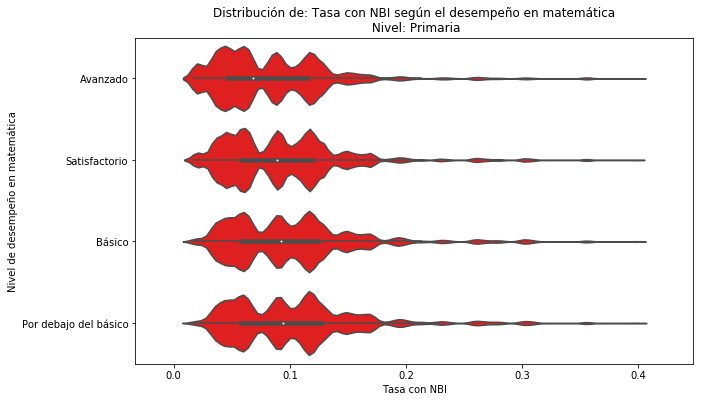

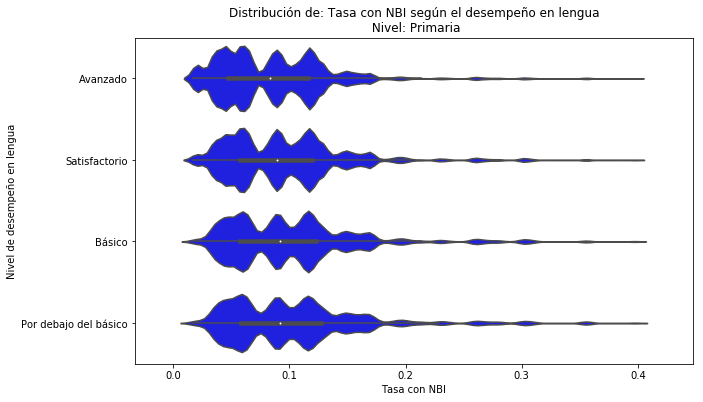

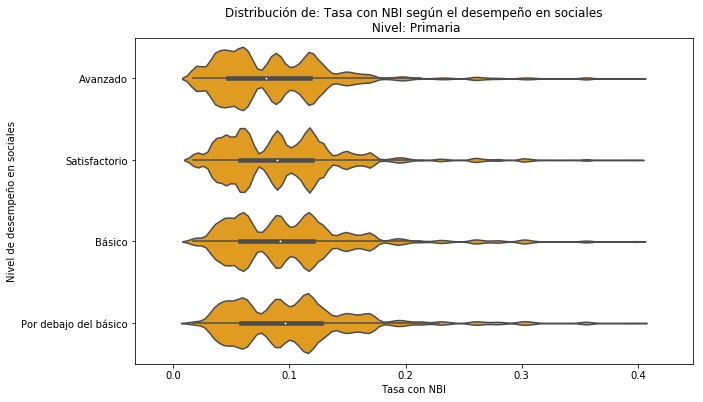

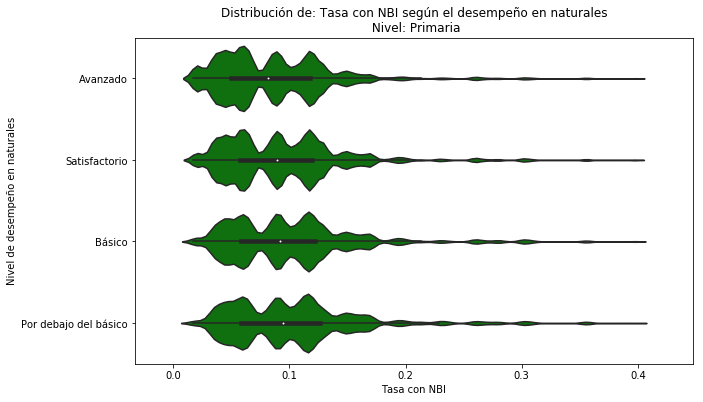

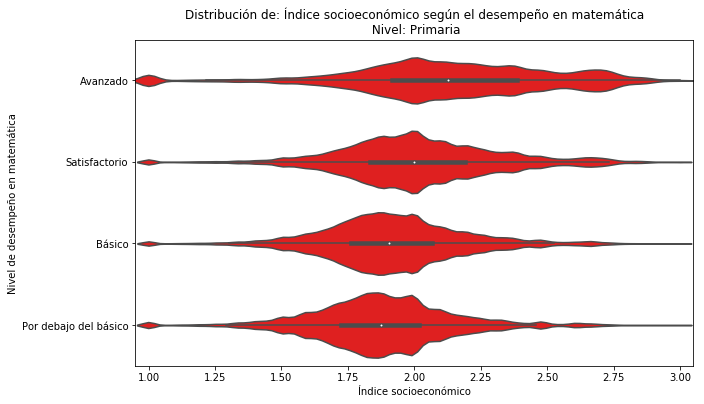

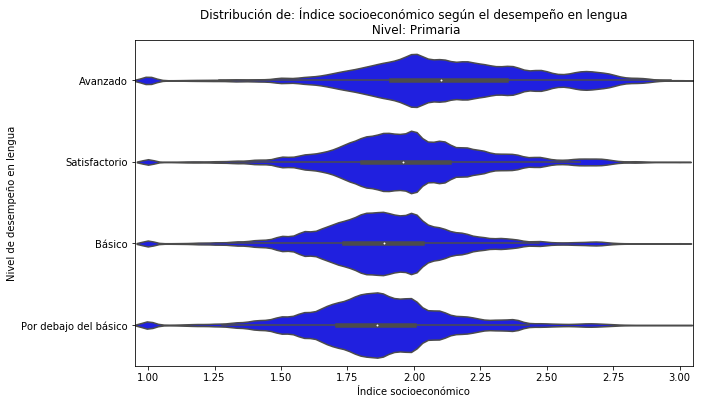

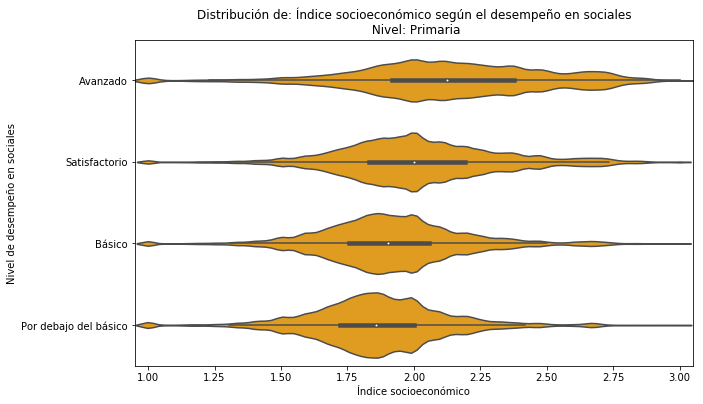

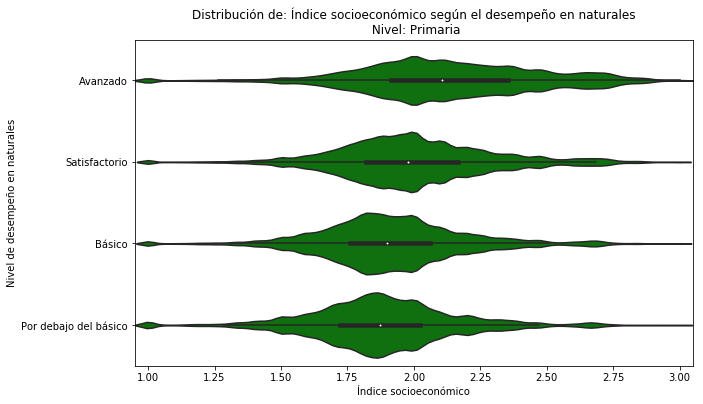

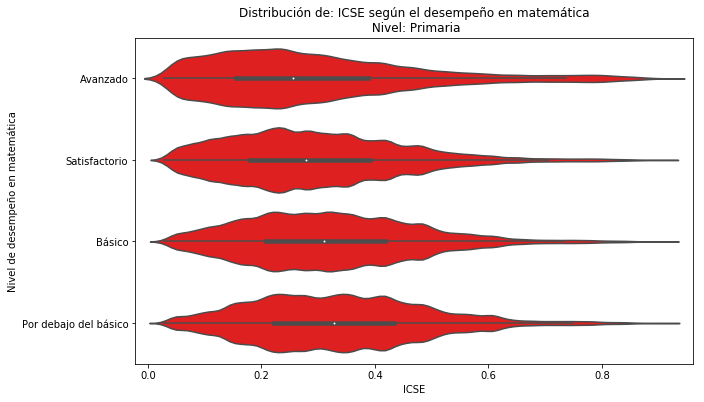

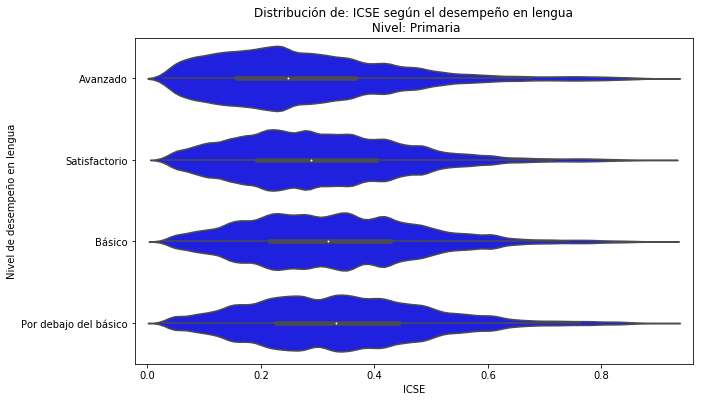

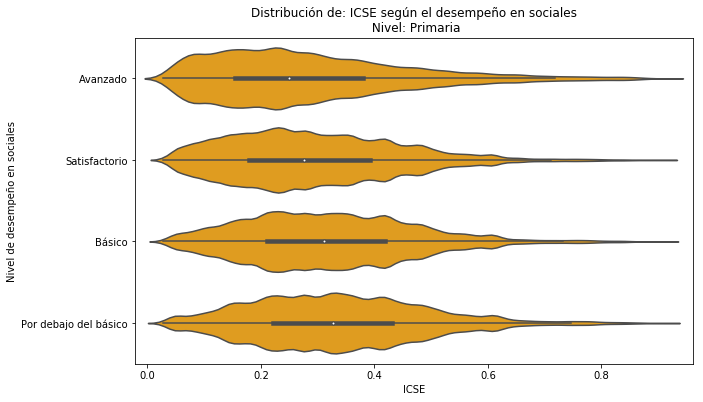

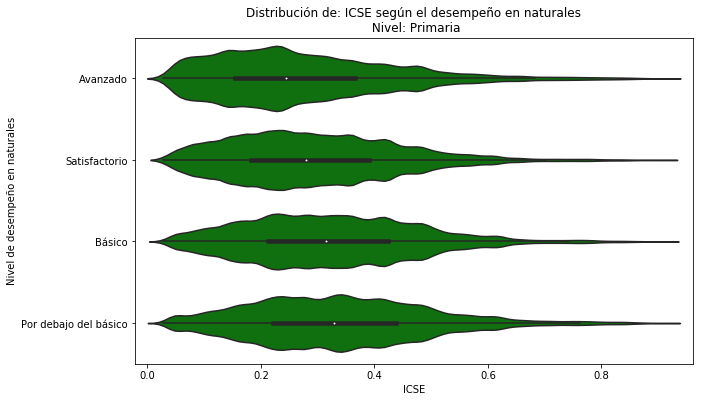

In [194]:
for feature in features_interes_continuas:
    for materia in subjects:
        aux = normalizar_dataframe_continuo(primaria,feature,materia)
        fig, ax = plt.subplots()
        fig.set_size_inches(10, 6)
        plt.title("Distribución de: "+ features_interes_continuas[feature] +" según el desempeño en "+ subjects[materia]+ "\n Nivel: Primaria")
        sns.violinplot(x=feature, y=materia, data=aux, order=ORDER,color=colors[materia])
        plt.xlim([min(aux[feature])-0.05,max(aux[feature])+0.05])
        plt.ylabel("Nivel de desempeño en " + subjects[materia])
        ax.set_yticklabels(XTIKS_DISCRETOS)
        plt.xlabel(features_interes_continuas[feature])
        plt.savefig("plots/distribucion_"+feature+"_segun_"+materia+"_primaria.svg",format = "svg", bbox_inches='tight')

## Variables secundaria

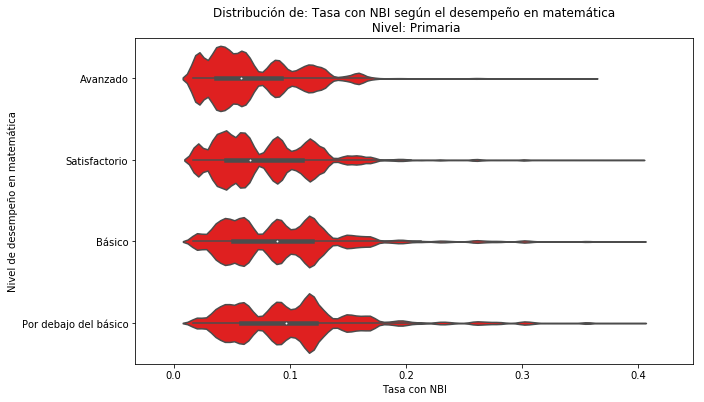

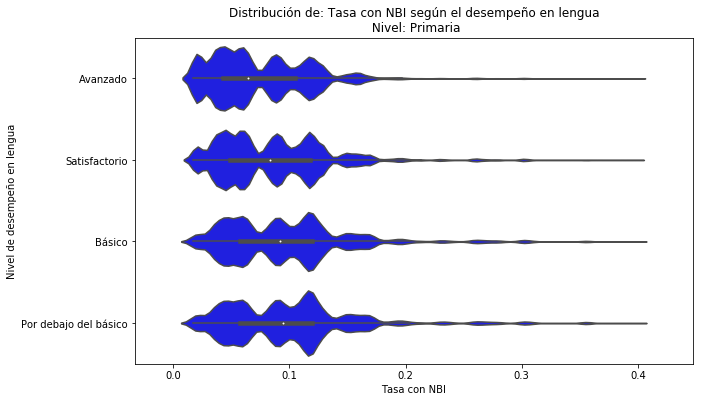

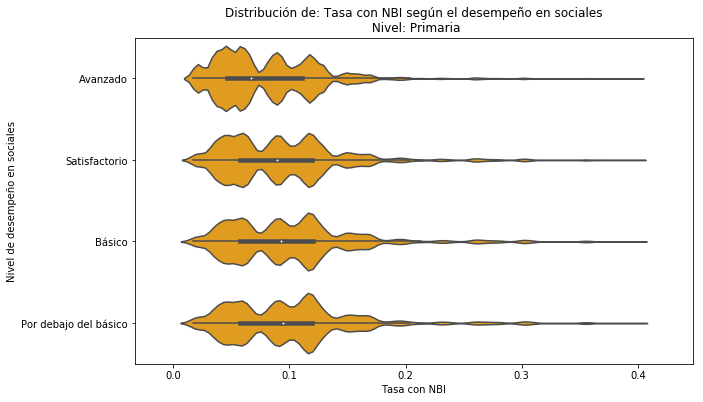

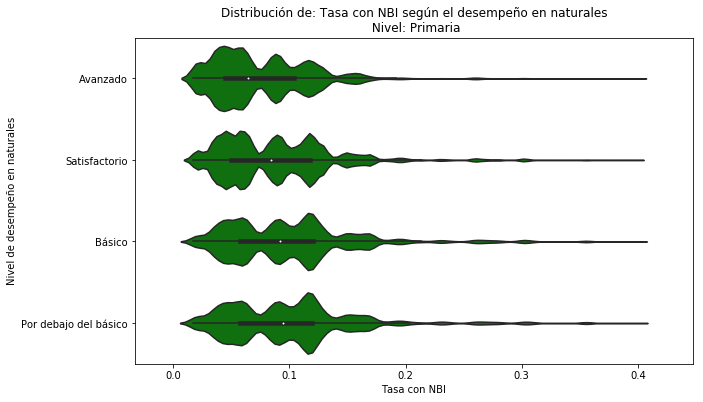

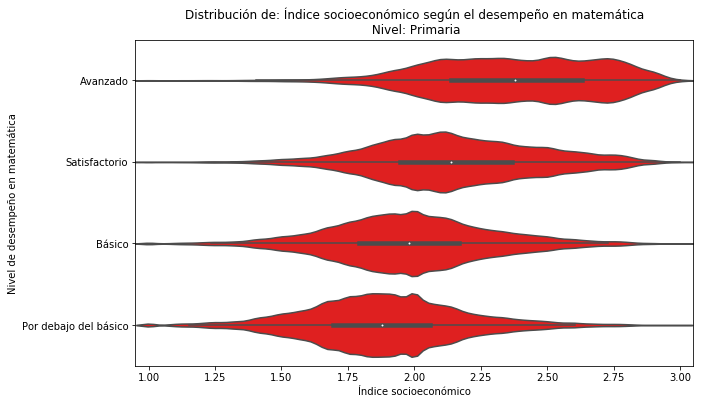

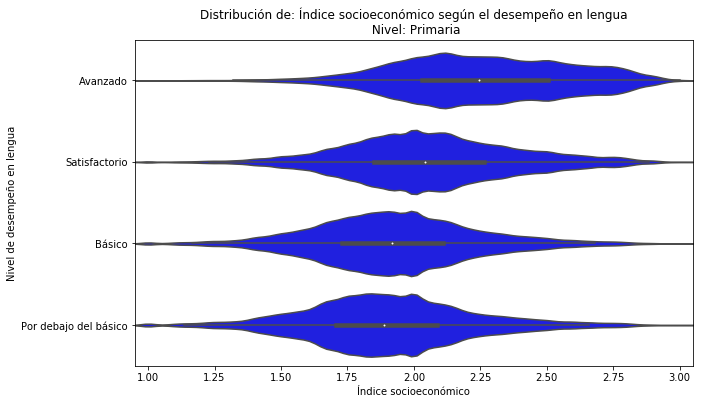

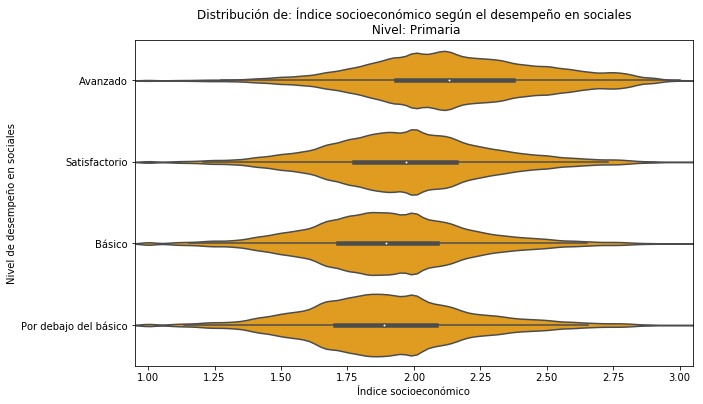

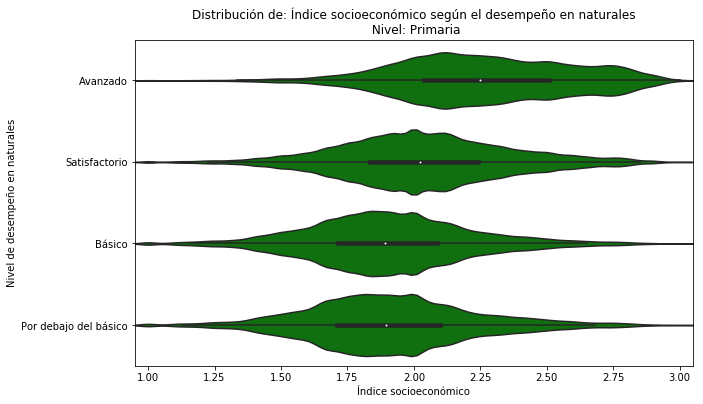

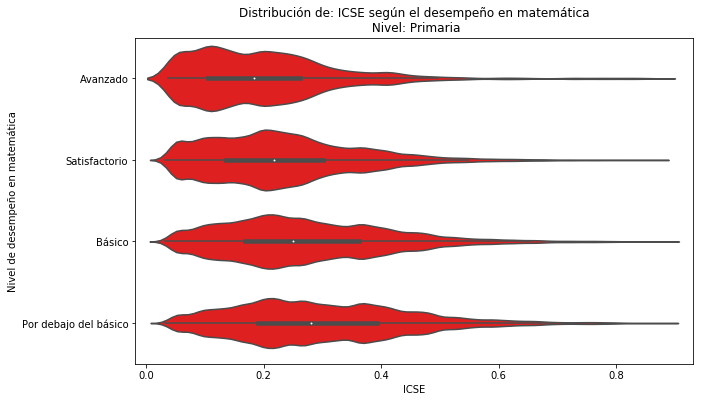

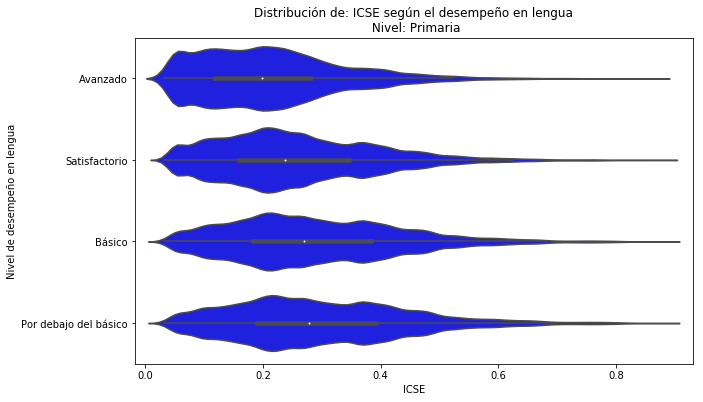

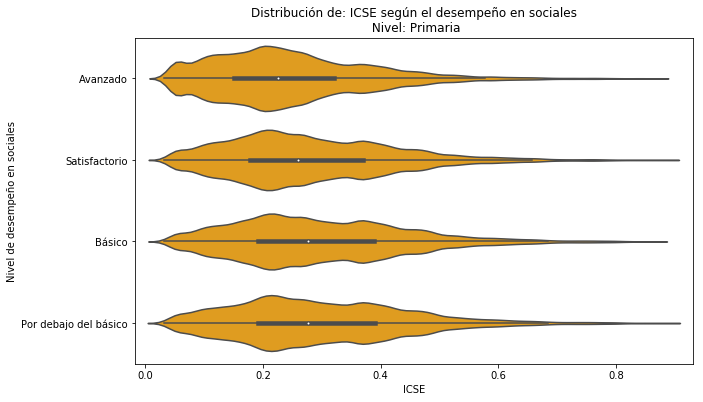

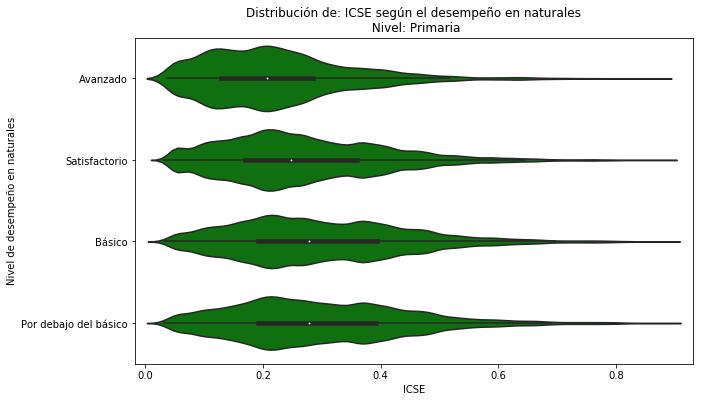

In [195]:
for feature in features_interes_continuas:
    for materia in subjects:
        aux = normalizar_dataframe_continuo(secundaria,feature,materia)
        fig, ax = plt.subplots()
        fig.set_size_inches(10, 6)
        plt.title("Distribución de: "+ features_interes_continuas[feature] +" según el desempeño en "+ subjects[materia]+ "\n Nivel: Primaria")
        sns.violinplot(x=feature, y=materia, data=aux, order=ORDER,color=colors[materia])
        plt.xlim([min(aux[feature])-0.05,max(aux[feature])+0.05])
        plt.ylabel("Nivel de desempeño en " + subjects[materia])
        ax.set_yticklabels(XTIKS_DISCRETOS)
        plt.xlabel(features_interes_continuas[feature])
        plt.savefig("plots/distribucion_"+feature+"_segun_"+materia+"_secundaria.svg",format = "svg", bbox_inches='tight')

## Prueba de una instancia de la generalización gráfica

(0, 0.5)

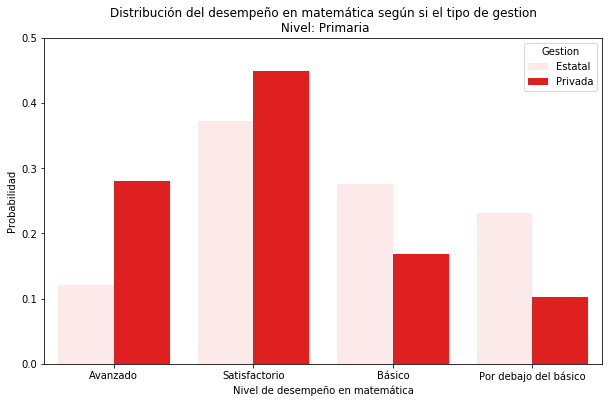

In [202]:
materia= SCORE_MATHS
feature = "gestion"
aux = normalize_dataframe(primaria,feature=feature,scores=materia)
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
plt.title("Distribución del desempeño en "+ subjects[materia] +" según si " + features_interes_discretas[feature]+ "\n Nivel: Primaria")
g = sns.barplot(x=materia,y=ponderators[materia],hue=feature,data=aux ,order= ORDER,color=colors[materia])
leg = g.axes.get_legend()
leg.set_title(LEGEND_TITLE[feature])
LABELS = LEGEND_DESCR[feature]
for t in leg.texts: t.set_text(LABELS[t.get_text()])
plt.ylabel("Probabilidad")
plt.xlabel("Nivel de desempeño en " + subjects[materia])
ax.set_xticklabels(XTIKS_DISCRETOS)
plt.ylim([0,max(0.5,max(aux[ponderators[materia]])+0.05)])

        

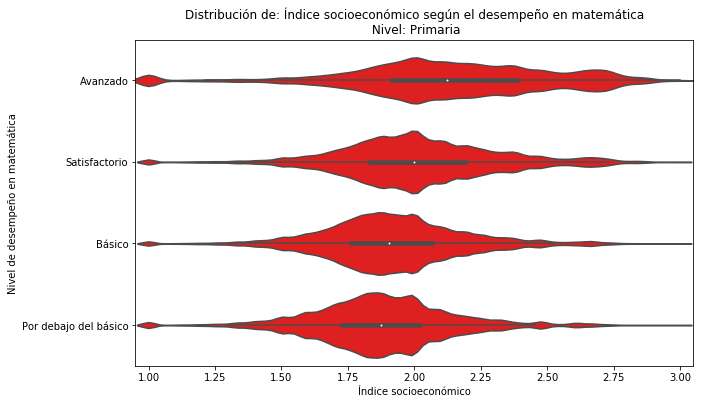

In [188]:
materia= SCORE_MATHS
feature = "indice_socioeconomico_medio"
aux = normalizar_dataframe_continuo(primaria,feature,materia) 
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
plt.title("Distribución de: "+ features_interes_continuas[feature] +" según el desempeño en "+ subjects[materia]+ "\n Nivel: Primaria")
sns.violinplot(x=feature, y=materia, data=aux, order=ORDER,color=colors[materia])
plt.xlim([min(aux[feature])-0.05,max(aux[feature])+0.05])
plt.ylabel("Nivel de desempeño en " + subjects[materia])
ax.set_yticklabels(XTIKS_DISCRETOS)
plt.xlabel(features_interes_continuas[feature])
plt.savefig("plots/distribucion_"+feature+"_segun_"+materia+"_primaria.svg",format = "svg", bbox_inches='tight')

In [186]:
print(aux[feature].value_counts())

 2.000000    70173
-1.000000    18278
 1.000000    15976
 1.500000    15822
 1.800000    15374
 1.750000    14036
 1.666667    12334
 2.200000    10488
 1.888889    10457
 1.857143    10313
 2.250000     9191
 1.833333     8766
 1.846154     8449
 2.333333     7493
 1.700000     7256
 2.166667     7123
 1.866667     7017
 1.900000     6979
 1.714286     6795
 1.923077     6772
 1.875000     6629
 1.823529     6506
 1.727273     6344
 1.600000     6299
 1.909091     5797
 1.916667     5709
 1.960000     5557
 1.333333     5460
 2.666667     5308
 1.937500     5298
             ...  
 2.884615       33
 2.023438       33
 2.614286       33
 2.775000       32
 2.709677       32
 2.544118       32
 2.337662       32
 1.347826       32
 2.770492       30
 1.521739       29
 2.018750       29
 2.293578       29
 1.227273       28
 2.725000       27
 2.522727       26
 1.076923       26
 2.840909       26
 2.925926       26
 2.641026       25
 1.277778       24
 2.337500       24
 2.459459   